In [3]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.optim import SGD
import torch.nn.functional as F

In [4]:
df = pd.read_csv("walmart_sales.csv")
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.shape

(6435, 8)

In [6]:
df.Date.max(), df.Date.min()

('31-12-2010', '01-04-2011')

In [7]:
x = df.drop(['Store', 'Weekly_Sales','Date'], axis =1)
y = df['Weekly_Sales']

In [8]:
x.isnull().sum()

Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
std = StandardScaler()
x_std = std.fit_transform(x)

In [10]:
x_std

array([[-0.27420425, -0.99513556, -1.71379998,  1.00417522,  0.05696366],
       [ 3.64691651, -1.20117022, -1.76608938,  1.00788038,  0.05696366],
       [-0.27420425, -1.12417832, -1.84016603,  1.009074  ,  0.05696366],
       ...,
       [-0.27420425, -0.33582468,  1.39741931,  0.52724129,  0.35604577],
       [-0.27420425, -0.22738539,  1.32987884,  0.52733249,  0.35604577],
       [-0.27420425, -0.09834264,  1.14032976,  0.52677459,  0.35604577]])

## 1. Input, output and model defining

In [11]:
X_train,X_test, y_train,  y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5148, 5), (5148,), (1287, 5), (1287,))

In [12]:
class Linearregression(nn.Module):
    def __init__(self, X_train):
        super(Linearregression,self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 1)

    def forward(self, x):
        x = (self.layer1(x))

        return x

model = Linearregression(X_train)
print(model)

Linearregression(
  (layer1): Linear(in_features=5, out_features=1, bias=True)
)


In [13]:
x = torch.tensor(np.array(X_train), dtype = torch.float32, requires_grad=True)
y = torch.tensor(np.array(y_train).reshape(-1,1), dtype = torch.float32)

## 2. Epochs, Learning rate, Loss, Optimizer

In [14]:
# Define model running parameters
epochs = 1000
learning_rate = 0.00001
mse_loss = torch.nn.MSELoss()
sgd_optim = torch.optim.SGD(model.parameters(), lr = learning_rate)

## 3. Run the forward pass and backward pass calculate loss

In [15]:
loss_list =[]
for epoch in range(epochs):
    sgd_optim.zero_grad(set_to_none=True)

    #Forward pass
    y_pred = model(x)

    #calculate loss
    l = mse_loss(y_pred, y)

    #Backaward pass
    l.backward()
    loss_list.append(l.item())
    #Update parameters
    sgd_optim.step()

    if epoch%100 == 0:
        print(f'Epochs : {epoch}, loss : {l.item()}')

Epochs : 0, loss : 1409479475200.0
Epochs : 100, loss : 378315440128.0
Epochs : 200, loss : 376870076416.0
Epochs : 300, loss : 376147279872.0
Epochs : 400, loss : 375585406976.0
Epochs : 500, loss : 375067279360.0
Epochs : 600, loss : 374568189952.0
Epochs : 700, loss : 374082666496.0
Epochs : 800, loss : 373609398272.0
Epochs : 900, loss : 373147860992.0


In [16]:
y_train_pred = model(torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(np.array(X_test),dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [17]:
X_train.shape

(5148, 5)

In [18]:
test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

-0.17378707171673957
-0.17787684253192348


In [19]:
y_test_pred_array = np.array(y_test_pred).reshape(-1, 1)

# Create DataFrame with actual and predicted values
pred_df = pd.DataFrame({"Actual": np.array(y_test).reshape(-1), "Predicted": y_test_pred_array.flatten()})
pred_df.head(10)

,Actual,Predicted
0,1138800.32,7.696963e+05
1,1304850.67,9.066982e+05
2,1769296.25,1.193675e+06
3,1077640.13,7.682131e+05
4,428851.99,1.141021e+06
5,1004523.59,9.400029e+05
6,1523410.71,9.769233e+05
7,1014898.78,1.003682e+06
8,1955896.59,1.192921e+06
9,958667.23,9.991011e+05


In [20]:
y_test.shape, y_test_pred.shape

((1287,), (1287, 1))

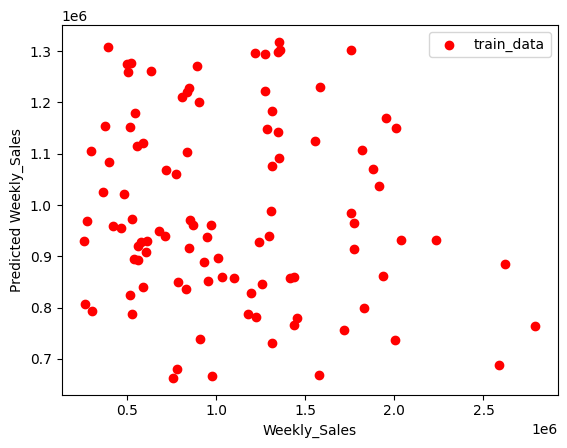

In [21]:
plt.xlabel("Weekly_Sales")
plt.ylabel("Predicted Weekly_Sales")
plt.scatter(y_train[:100],y_train_pred[:100],color='r',label="train_data")
#plt.scatter(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

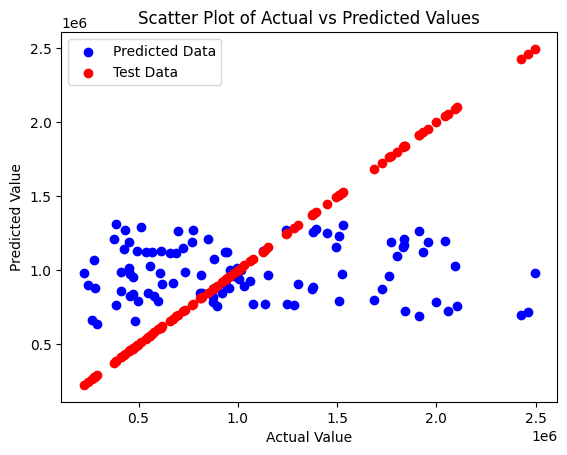

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test[:100], y_test_pred[:100], color='b', label="Predicted Data")
plt.scatter(y_test[:100], y_test[:100], color='r', label="Test Data")  # Plotting y_test for comparison
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.title("Scatter Plot of Actual vs Predicted Values")
plt.show()

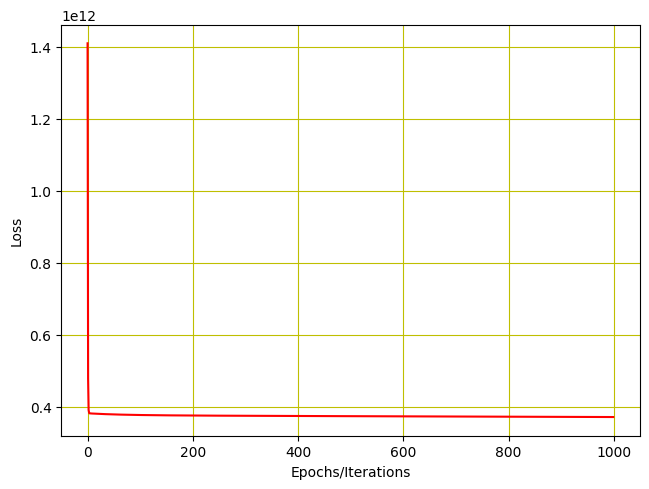

In [23]:
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()